<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week11/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRTV6kfmSkZLO4vx8jtyQwSTey5RdOUR0IIzqZTHTexbFEQcZQy7_gKFPw9fxmMxUfoutVbsrH0X-Oj/pub?output=csv'
df = pd.read_csv(url, index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [8]:
df.drop_duplicates(inplace = True)
df.dropna(inplace = True)
print(df.duplicated().sum(), df.isna().sum().sum())

0 0


In [9]:
# Set target and features
X = df.drop(columns = 'TARGET_5Yrs')
y = df['TARGET_5Yrs']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
# Get the number of input nodes
input_nodes = X_train.shape[1]

In [12]:
# We already built the model without early stopping.
# So we go straight to early stopping.
model = Sequential()
# First hidden layer
model.add(Dense(19, input_dim = input_nodes, activation = 'relu'))
# Second hidden layer
model.add(Dense(10, activation = 'relu'))
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Compile the model
model.compile(loss = 'bce', optimizer = 'adam')
# Instantiate an early stoppe
early_stopping = EarlyStopping(patience = 5)
# Train the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100,
                    callbacks = [early_stopping])

Epoch 1/100
31/31 [==============================] - 1s 13ms/step - loss: 0.6409 - val_loss: 0.6239
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6014 - val_loss: 0.5952
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5849 - val_loss: 0.5813
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5748 - val_loss: 0.5721
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5678 - val_loss: 0.5659
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5632 - val_loss: 0.5642
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5589 - val_loss: 0.5619
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5555 - val_loss: 0.5603
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5527 - val_loss: 0.5592
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5503 - val_loss: 0.5560
Epoch 11

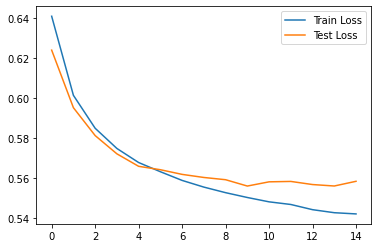

In [13]:
# Plot the loss
plt.plot(history.history['loss'], label = 'Train Loss');
plt.plot(history.history['val_loss'], label = 'Test Loss');
plt.legend()